# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

- Gender / Education / Income
    - Does the average salary for men and women increase at the same rate with education
- Does M

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
# import seaborn
import seaborn as sns
from scipy.stats import ttest_1samp

# import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import os

# Normality Testing
from scipy.stats import anderson
from scipy.stats import shapiro

# import geopandas 
import geopandas as gpd
import geopy
import plotly.graph_objs as go
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df['Approval'] = df['Loan_Status'] == 'Y'
df['Married'] = df['Married'] =='Yes'
df['Dependents'] =df['Dependents'] != '0'

In [4]:
df_femmes = df[df['Gender'] == 'Female']
df_hommes = df[df['Gender'] != 'Female']

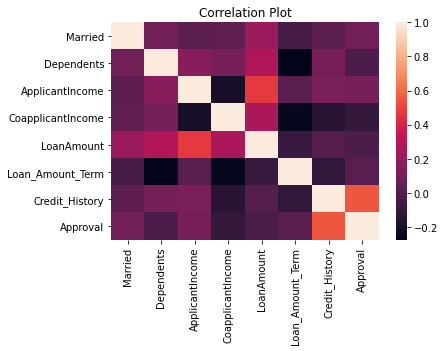

In [5]:
fdf_corr = df_femmes.corr()
sns.heatmap(fdf_corr)
plt.title('Correlation Plot')
plt.show()

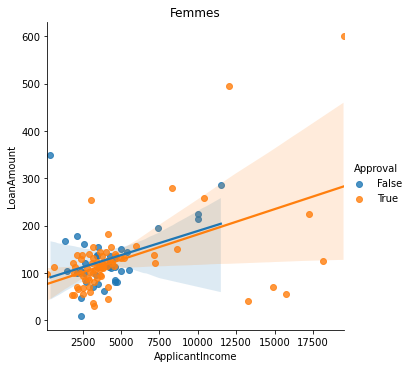

In [6]:
f_app= sns.lmplot(x='ApplicantIncome', y='LoanAmount', hue= 'Approval', data=df_femmes)
axes = f_app.axes.flatten()
axes[0].set_title("Femmes")

plt.show()

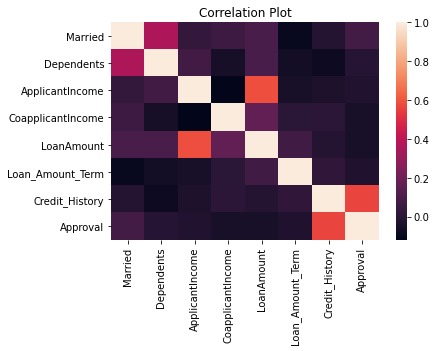

In [7]:
hdf_corr = df_hommes.corr()
sns.heatmap(hdf_corr)
plt.title('Correlation Plot')
plt.show()

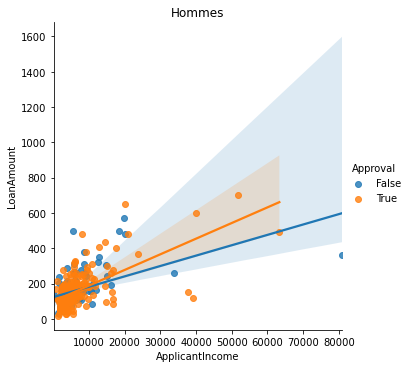

In [8]:
h_app= sns.lmplot(x='ApplicantIncome', y='LoanAmount', hue= 'Approval', data=df_hommes)
axes = h_app.axes.flatten()
axes[0].set_title("Hommes")

plt.show()

Well it appears that men are approved for loans at a higher rate than women. Judging by the correlation plot, all factors being measured have a stronger impact on the likelihood of a woman being approved for a loan than a man.

In [9]:
df = df.drop('Dependents', axis = 1)

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [10]:
# Define function to identify columns with missing values
def missing_vals(x):
    total = x.isnull().sum().sort_values(ascending=False)
    percent = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [11]:
missing_vals(df)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Approval,0,0.000000
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000
ApplicantIncome,0,0.000000


Look at some basic statistics for numerical variables.

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

In [12]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Less than 25% of applicants are without a credit history. Of course there are also 50 NaN that haven't been accounted for, but even if those 50 fall under the "no credit history" category, they still make up 22.6% of the total.

2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

In [13]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [14]:
df['ApplicantIncome'].value_counts(bins=10)

(69.149, 8235.0]      533
(8235.0, 16320.0]      59
(16320.0, 24405.0]     15
(32490.0, 40575.0]      4
(72915.0, 81000.0]      1
(56745.0, 64830.0]      1
(48660.0, 56745.0]      1
(64830.0, 72915.0]      0
(40575.0, 48660.0]      0
(24405.0, 32490.0]      0
Name: ApplicantIncome, dtype: int64

In [15]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [16]:
df['CoapplicantIncome'].value_counts(bins=10)

(-41.668, 4166.7]     561
(4166.7, 8333.4]       46
(8333.4, 12500.1]       3
(16666.8, 20833.5]      2
(37500.3, 41667.0]      1
(33333.6, 37500.3]      1
(29166.9, 33333.6]      0
(25000.2, 29166.9]      0
(20833.5, 25000.2]      0
(12500.1, 16666.8]      0
Name: CoapplicantIncome, dtype: int64

This is what I had expected. There are far more applicants at the low end of the scale than at the high end. I also would have expected the coapplicant to earn less than the applicant as I would think the higher earning person would be the primary applicant. There is also somewhere between 25-50% of loan applicants that either don't have a coapplicant or the coapplicant does not have an income.

3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

There definitely appears to be a positive skew on both of these columns. The mean in both cases far exceeds the 50% mark.

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [17]:
df.dtypes

Loan_ID               object
Gender                object
Married                 bool
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Approval                bool
dtype: object

In [18]:
df['Married'].value_counts()

True     398
False    216
Name: Married, dtype: int64

In [19]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [24]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [25]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [26]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [27]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [28]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [29]:
df_approved['Gender'].value_counts()

NameError: name 'df_approved' is not defined

In [32]:
df_femmes['Education'].value_counts()

Graduate        92
Not Graduate    20
Name: Education, dtype: int64

In [33]:
df_hommes['Education'].value_counts()

Graduate        388
Not Graduate    114
Name: Education, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



Skewness: 6.539513
Kurtosis: 60.540676


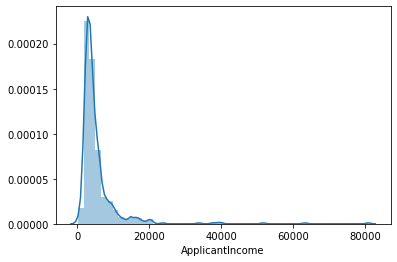

In [34]:
#Check for distribution/Kurtosis/Skewness
sns.distplot(df['ApplicantIncome']);

print('Skewness: %f' % df['ApplicantIncome'].skew())
print('Kurtosis: %f' % df['ApplicantIncome'].kurt())

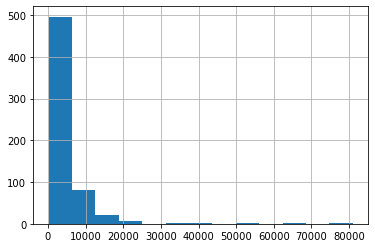

In [35]:
hist = df['ApplicantIncome'].hist(bins=13)

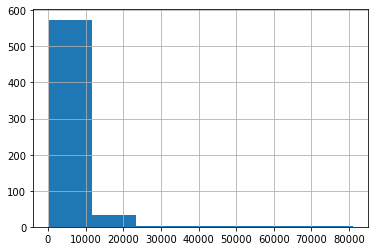

In [36]:
hist = df['ApplicantIncome'].hist(bins=7)

Skewness: 7.491531
Kurtosis: 84.956384


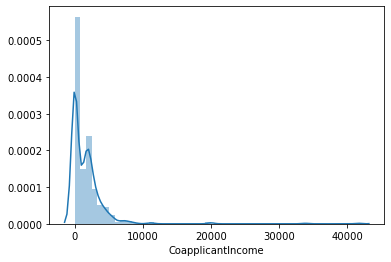

In [37]:
#Check for distribution/Kurtosis/Skewness
sns.distplot(df['CoapplicantIncome']);

print('Skewness: %f' % df['CoapplicantIncome'].skew())
print('Kurtosis: %f' % df['CoapplicantIncome'].kurt())

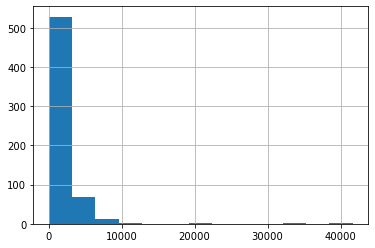

In [38]:
hist = df['CoapplicantIncome'].hist(bins=13)


Look at box plots to understand the distributions. 

In [275]:
Income_Range = df.sort_values(by = 'ApplicantIncome')
Income_Range['ApplicantIncome'] = Income_Range['ApplicantIncome'].astype(str).str[0:-3] + ('000')
Income_Range['ApplicantIncome'] = Income_Range['ApplicantIncome'].astype(int)

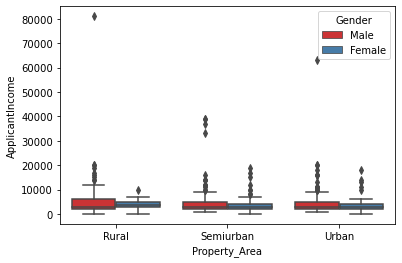

In [277]:
ax = sns.boxplot(x="Property_Area", y="ApplicantIncome", hue="Gender",
                 data=Income_Range, palette="Set1")

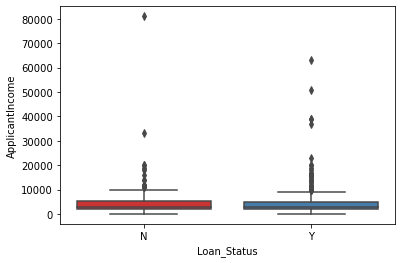

In [281]:
ax = sns.boxplot(y="ApplicantIncome",x="Loan_Status",
                 data=Income_Range, palette="Set1")

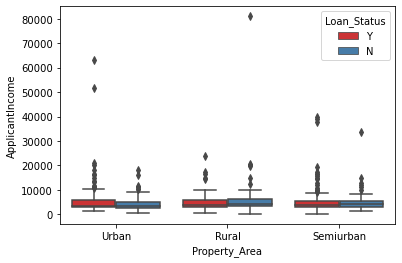

In [267]:
ax = sns.boxplot(x="Property_Area", y="ApplicantIncome", hue="Loan_Status",
                 data=df, palette="Set1")

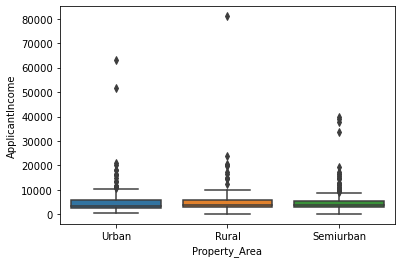

In [259]:
ax = sns.boxplot(y="ApplicantIncome", x="Property_Area", data=df)

Look at the distribution of income segregated  by `Education`

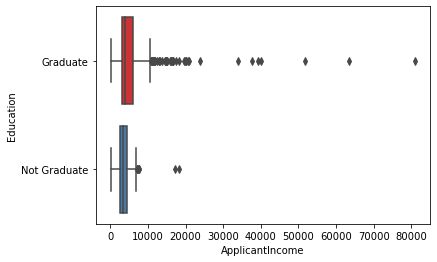

In [283]:
ax = sns.boxplot( x="ApplicantIncome", y="Education",
                 data=df, palette="Set1")

Look at the histogram and boxplot of LoanAmount

hist = df['LoanAmount'].hist(bins=15)

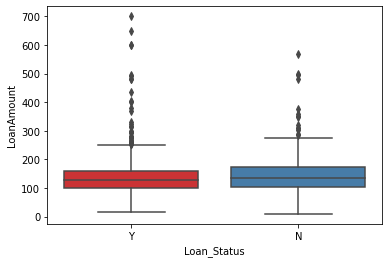

In [479]:
ax = sns.boxplot( x="Loan_Status", y="LoanAmount",
                 data=df, palette="Set1")

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [39]:
df["Loan_Status"] = df["Loan_Status"].astype("category")
df["Loan_Status"].cat.set_categories(["Y","N"],inplace=True)

In [40]:
pd.pivot_table(df,index=['Gender', 'Education'])

ApplicantIncome  Approval  CoapplicantIncome  \
Gender Education                                                    
Female Graduate          4646.467391  0.663043        1231.206522   
       Not Graduate      4629.700000  0.700000         541.300000   
Male   Graduate          5992.345745  0.720745        1845.691277   
       Not Graduate      3630.061947  0.601770        1401.008850   

                     Credit_History  LoanAmount  Loan_Amount_Term   Married  
Gender Education                                                             
Female Graduate            0.831325  129.855556        350.769231  0.271739  
       Not Graduate        0.833333  111.736842        360.000000  0.300000  
Male   Graduate            0.865330  157.994490        343.317073  0.731383  
       Not Graduate        0.784314  119.654206        327.302752  0.725664

In [41]:
data= df.groupby(['Gender', 'Property_Area', 'Education']).mean()

In [42]:
data

Married  ApplicantIncome  \
Gender Property_Area Education                                 
Female Rural         Graduate      0.166667      4370.555556   
                     Not Graduate  0.333333      4301.833333   
       Semiurban     Graduate      0.355556      4914.200000   
                     Not Graduate  0.400000      4216.100000   
       Urban         Graduate      0.206897      4402.275862   
                     Not Graduate  0.000000      6155.500000   
Male   Rural         Graduate      0.718182      6379.018182   
                     Not Graduate  0.682927      3846.170732   
       Semiurban     Graduate      0.750000      5925.867647   
                     Not Graduate  0.694444      3473.250000   
       Urban         Graduate      0.723077      5734.707692   
                     Not Graduate  0.805556      3540.750000   

                                   CoapplicantIncome  LoanAmount  \
Gender Property_Area Education                                     
Female Rural         Graduate             696.722222  126.166667   
                     Not Graduate           0.000000  109.666667   
       Semiurban     Graduate             958.177778  140.186047   
                     Not Graduate         846.100000  114.000000   
       Urban         Graduate            1986.620690  116.827586   
                     Not Graduate         591.250000  108.333333   
Male   Rural         Graduate            1992.182909  167.320755   
                     Not Graduate        1312.536585  124.794872   
       Semiurban     Graduate            1765.301471  156.533835   
                     Not Graduate        1510.166667  118.444444   
       Urban         Graduate            1805.836923  151.588710   
                     Not Graduate        1392.611111  114.750000   

                                   Loan_Amount_Term  Credit_History  Approval  
Gender Property_Area Education                                                 
Female Rural         Graduate            373.333333        0.937500  0.555556  
                     Not Graduate        360.000000        1.000000  0.666667  
       Semiurban     Graduate            341.333333        0.833333  0.755556  
                     Not Graduate        360.000000        0.888889  0.800000  
       Urban         Graduate            351.428571        0.760000  0.586207  
                     Not Graduate        360.000000        0.500000  0.500000  
Male   Rural         Graduate            339.888889        0.813725  0.654545  
                     Not Graduate        344.615385        0.815789  0.536585  
       Semiurban     Graduate            351.044776        0.884615  0.779412  
                     Not Graduate        333.600000        0.838710  0.750000  
       Urban         Graduate            338.078740        0.888889  0.715385  
                     Not Graduate        301.714286        0.696970  0.527778

In [43]:
df['Female'] = df['Gender'] =='Female'
df['Male'] = df['Gender'] !='Female'

In [44]:
pd.DataFrame(df.groupby(['Loan_Status', 'Gender']).count()['Loan_ID']).unstack()

Loan_ID     
Gender       Female Male
Loan_Status             
Y                75  339
N                37  150

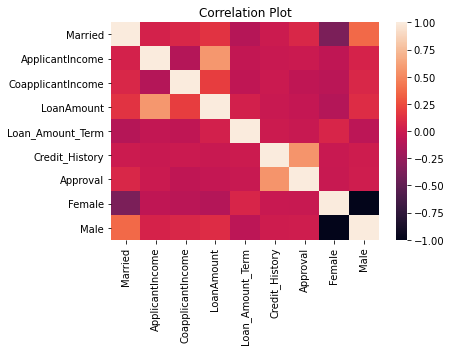

In [45]:
df_corr = df.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

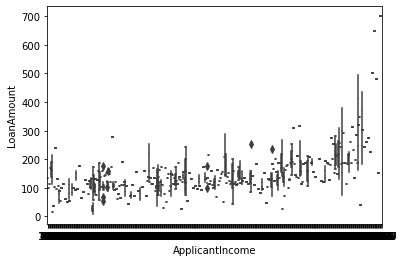

In [46]:
ax = sns.boxplot( x="ApplicantIncome", y="LoanAmount",
                 data=df, palette="Set1")

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

In [47]:
data = pd.read_csv("data.csv") 

In [48]:
missing_vals(data)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [49]:
missing = data[data.isnull().sum(axis=1) > 0]
lat = missing.sort_values(by='LoanAmount')
lat.tail(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y


In [50]:
print(missing.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [51]:
#Very low amount of rows with missing columns so I will drop them
data["Self_Employed"] = data["Self_Employed"].fillna(2)
data["Gender"] = data["Gender"].fillna(2)
data["Married"] = data["Married"].fillna(2)
data["Dependents"] = data["Dependents"].fillna(0)
data["Credit_History"] = data["Credit_History"].fillna(2.0)
data["LoanAmount"] = data["LoanAmount"].fillna(data['LoanAmount'].mean())
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(60.0)

In [52]:
missing_vals(data)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


In [53]:
data["Gender"] = data["Gender"].replace('Female',0).replace('Male', 1)
data["Dependents"] = data["Dependents"].replace('3+', 3).astype(int)
data['Dependents'] = data['Dependents'].astype(int)
data['Married'] = data['Married'].replace('Yes',1).replace('No',0)
data['Self_Employed'] = data['Self_Employed'].replace('Yes',1).replace('No',0).replace('Unknown',2)
data['Education'] = data['Education'].replace('Graduate',1).replace('Not Graduate',0)
data["Loan_Status"] = data["Loan_Status"].replace('N',0).replace('Y', 1)
data["Property_Area"] = data["Property_Area"].replace('Rural',0).replace('Semiurban', 1).replace('Urban', 2)

In [54]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [55]:
data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [56]:
missing_vals(data)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [57]:
from scipy import stats
data['BoxLoanAmount'] = stats.boxcox(data['LoanAmount'])[0]

Skewness: 2.726601
Kurtosis: 10.896456


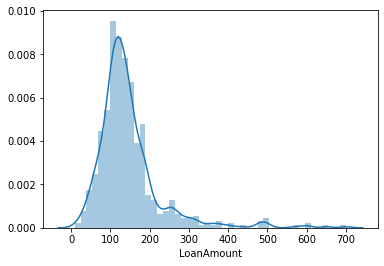

In [58]:
#Check for distribution/Kurtosis/Skewness
sns.distplot(data['LoanAmount']);

print('Skewness: %f' % data['LoanAmount'].skew())
print('Kurtosis: %f' % data['LoanAmount'].kurt())

Skewness: 0.030458
Kurtosis: 2.448059


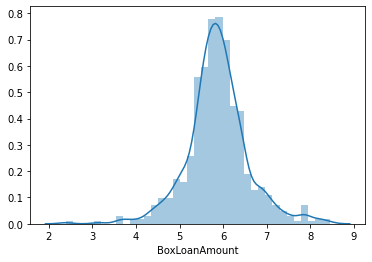

In [59]:
#Check for distribution/Kurtosis/Skewness
sns.distplot(data['BoxLoanAmount']);

print('Skewness: %f' % data['BoxLoanAmount'].skew())
print('Kurtosis: %f' % data['BoxLoanAmount'].kurt())

Combine both incomes as total income and take a log transformation of the same.

In [60]:
data['Combined_Income'] = data['ApplicantIncome']+data['CoapplicantIncome']

Skewness: 5.633449
Kurtosis: 45.784414


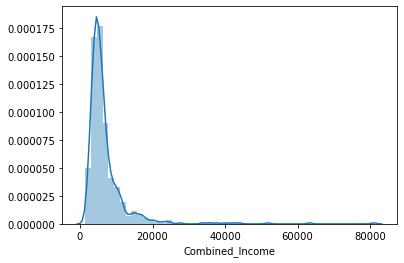

In [61]:
#Check for distribution/Kurtosis/Skewness
sns.distplot(data['Combined_Income']);

print('Skewness: %f' % data['Combined_Income'].skew())
print('Kurtosis: %f' % data['Combined_Income'].kurt())

In [62]:
data['BoxIncome'] = stats.boxcox(data['Combined_Income'])[0]

Skewness: -0.034662
Kurtosis: 0.528679


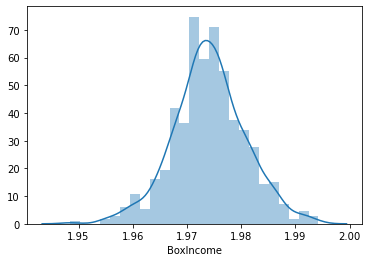

In [63]:
#Check for distribution/Kurtosis/Skewness
sns.distplot(data['BoxIncome']);

print('Skewness: %f' % data['BoxIncome'].skew())
print('Kurtosis: %f' % data['BoxIncome'].kurt())

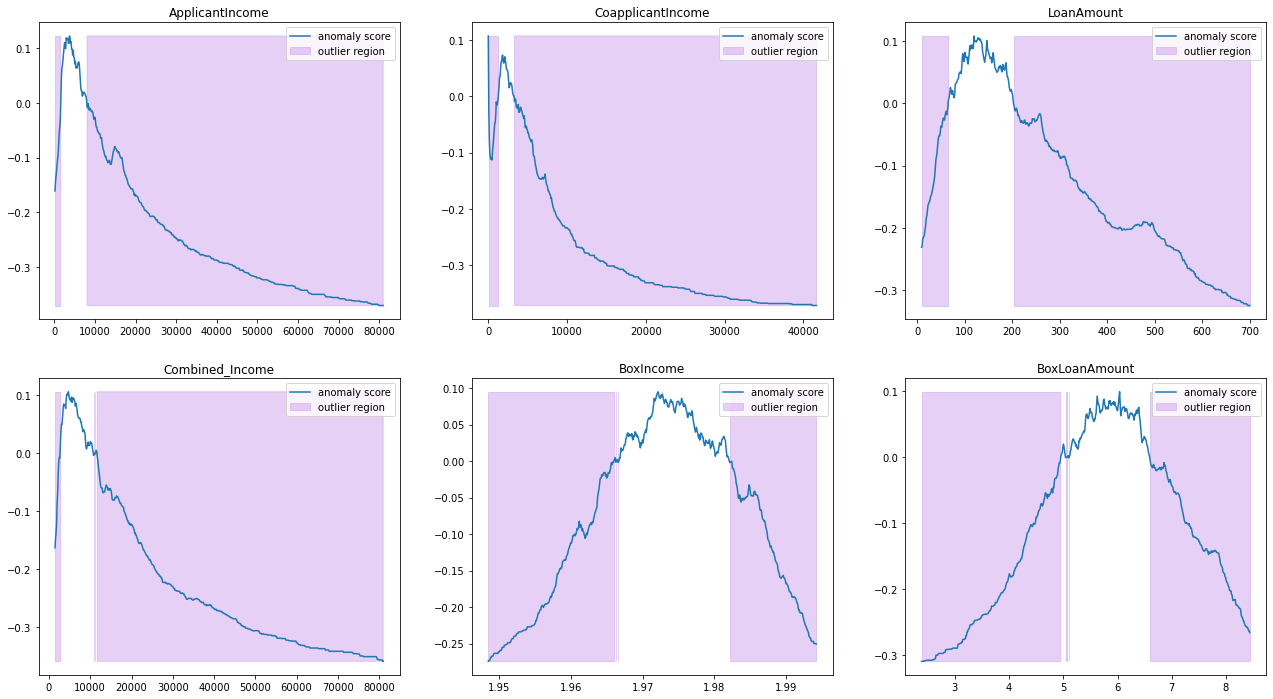

In [64]:
#import package
from sklearn.ensemble import IsolationForest
cols = ['ApplicantIncome',
       'CoapplicantIncome',
       'LoanAmount',
       'Combined_Income',
       'BoxIncome',
       'BoxLoanAmount']

#Set plot configuration
fig, axs = plt.subplots(2, 3, figsize = (22, 12), facecolor = 'w', edgecolor = 'k')
axs = axs.ravel()

#Iterate through specified columns and isolate outliers(points outside a specified anomoly score)
for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(data[column].values.reshape(-1,1))

    xx = np.linspace(data[column].min(), data[column].max(), len(data)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                       where = outlier ==-1, color='#C58BE7',
                       alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In [65]:
def outlier_alert(df, col, x):
    std = df[col].std()
    mean = df[col].std()
    std_top = mean + std*x
    std_bottom = mean - std*x
    clean_dep = df[df[col] >= std_bottom]
    cleaner_dep = clean_dep[clean_dep[col] <= std_top]
    return cleaner_dep


In [66]:
data['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [67]:
clean = outlier_alert(data,'ApplicantIncome', 1)
data_clean = clean['ApplicantIncome']
data_clean.describe()


count      577.000000
mean      4283.074523
std       2173.898104
min        150.000000
25%       2768.000000
50%       3691.000000
75%       5250.000000
max      12000.000000
Name: ApplicantIncome, dtype: float64

In [68]:
data_clean = data[data['ApplicantIncome']< 12000]

In [69]:
data_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,BoxLoanAmount,Combined_Income,BoxIncome
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,6.034999,5849.0,1.975060
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,5.841340,6091.0,1.975586
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.914615,3000.0,1.964668
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,5.749027,4941.0,1.972752
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,5.980529,6000.0,1.975392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1,5.014562,2900.0,1.964042
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1,4.243627,4106.0,1.969985
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1,6.843402,8312.0,1.979286
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1,6.392580,7583.0,1.978253


In [70]:
data['BoxLoanAmount'].describe()

count    614.000000
mean       5.868823
std        0.711063
min        2.386645
25%        5.494124
50%        5.852502
75%        6.206635
max        8.437772
Name: BoxLoanAmount, dtype: float64

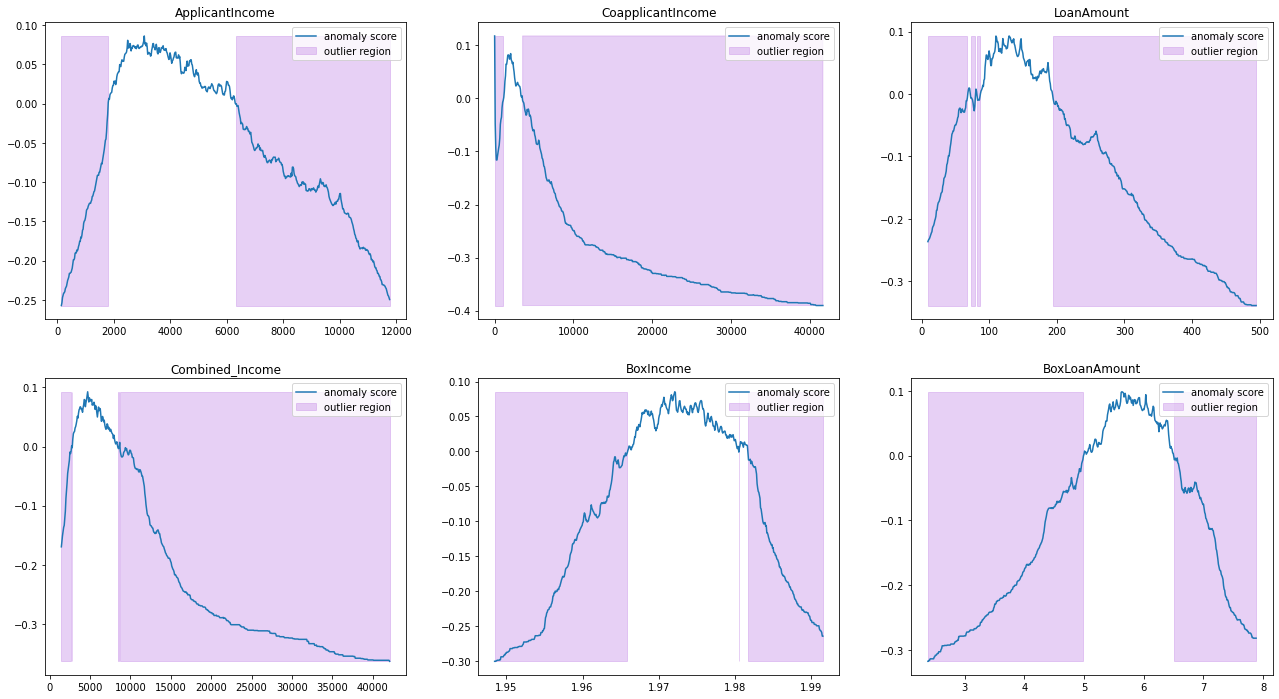

In [72]:
cols = ['ApplicantIncome',
       'CoapplicantIncome',
       'LoanAmount',
       'Combined_Income',
       'BoxIncome',
       'BoxLoanAmount']

#Set plot configuration
fig, axs = plt.subplots(2, 3, figsize = (22, 12), facecolor = 'w', edgecolor = 'k')
axs = axs.ravel()

#Iterate through specified columns and isolate outliers(points outside a specified anomoly score)
for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(data_clean[column].values.reshape(-1,1))

    xx = np.linspace(data_clean[column].min(), data_clean[column].max(), len(data_clean)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                       where = outlier ==-1, color='#C58BE7',
                       alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

## 4. Building a Predictive Model

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [74]:
data_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,BoxLoanAmount,Combined_Income,BoxIncome
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,6.034999,5849.0,1.975060
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,5.841340,6091.0,1.975586
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.914615,3000.0,1.964668
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,5.749027,4941.0,1.972752
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,5.980529,6000.0,1.975392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1,5.014562,2900.0,1.964042
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1,4.243627,4106.0,1.969985
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1,6.843402,8312.0,1.979286
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1,6.392580,7583.0,1.978253


In [81]:
X1 = data_clean.drop(['Gender','Loan_ID','ApplicantIncome','LoanAmount','Combined_Income', 'CoapplicantIncome'], axis = 1)
y1 = data_clean['Gender']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=109)

In [82]:
#Create an svm classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X1_train, y1_train)

#Predict the response for test dataset
y1_pred = clf.predict(X1_test)

print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.8


In [83]:
clf = GaussianNB()
clf.fit(X1_train, y1_train)
pred = clf.predict(X1_test)
print("Accuracy:" , metrics.accuracy_score(y1_test, pred))

Accuracy: 0.8347826086956521


In [ ]:
#create a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100)

#train the model using the training sets
clf.fit(X1_train, y1_train)

y_pred=clf.predict(X1_test)
print("Accuracy:" , metrics.accuracy_score(y1_test, y1_pred))

In [89]:
X = data.drop(['Loan_Status','LoanAmount','Loan_ID','Combined_Income', 'CoapplicantIncome'], axis = 1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

In [90]:
X.dtypes

Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
ApplicantIncome       int64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int64
BoxLoanAmount       float64
BoxIncome           float64
dtype: object

In [91]:
#Create an svm classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:" , metrics.accuracy_score(y_test, y_pred))

# what percentee of positive tuples are labled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8048780487804879
Precision: 0.7857142857142857
Recall: 1.0


In [92]:
#Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Accuracy:" , metrics.accuracy_score(y_test, pred))

Accuracy: 0.8292682926829268


In [93]:
pipeline = Pipeline([
    ('clf', GaussianNB())
])

parameters = {
    'clf__priors': [None],
    'clf__var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred_gnb = cv.predict(X_test)


NameError: name 'Pipeline' is not defined

In [94]:
#create a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100)

#train the model using the training sets
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
print("Accuracy:" , metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7967479674796748


In [95]:
# Instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=300)

# Fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15, 20],
       [ 1, 87]])

In [96]:
print("Accuracy:" , metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8292682926829268


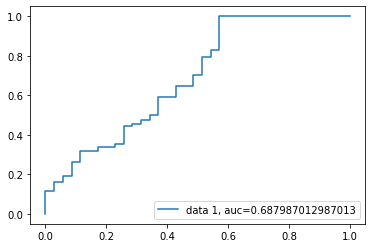

In [97]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Try paramater grid search to improve the results

In [786]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X, y)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [695]:
scaler = StandardScaler()
print(scaler.fit(X))
StandardScaler()
X = scaler.transform(X)

StandardScaler()


In [700]:
parameter_candidates =[
    {'C': [1, 10, 20], 'kernel': ['linear']},
    {'C': [1, 10, 20], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [ ]:
#view the accuracy score
print('Best score for data1:', clf.best_score_)

In [697]:
def svc_param_selection(X, y, nfolds):
    Cs = [ 0.1, 1]
    gammas = [ 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [724]:
svc_param_selection(X, y, 5)

{'C': 0.1, 'gamma': 0.1}

In [632]:
parameter_candidates =[
    {'C': [1, 10, 50], 'kernel': ['linear']},
    {'C': [1, 10, 50], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
]

In [699]:
gsc = GridSearchCV(
    estimator=svm.SVC(kernel='linear'),
    param_grid={
        'C': [1],
        'epsilon':[  0.05, 0.1, 0.5],
        'gamma':[ 0.1, 1, 3]
    },
    cv = 5, scoring='neg_mean_squared_error', verbose=0, n_jobs = -1)

grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_

best_svr = SVR(kernel = 'linear', C = best_params ["C"],
              epsilon = best_params["epsilon"], gamma = best_params["gamma"],
              coef0=0.1, shrinking=True,
              tol=0.001, cache_size = 200, verbose = False,
              max_iter = -1)

ValueError: Invalid parameter epsilon for estimator SVC(C=1, kernel='linear'). Check the list of available parameters with `estimator.get_params().keys()`.

In [634]:
#Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs =-1)

#Train the classifier on data1's feature and target data
clf.fit(X, y)

KeyboardInterrupt: 

In [ ]:
#View the best parameters for the model found using grid search
print('Best C:', clf.best_estimator_.C)
print('Best Kernel:', clf.best_estimator_.kernel)
print('Best Gamma:', clf.best_estimator_.gamma)

In [ ]:
#train a new classifier using best parameters
svm.SVC(C=10, kernel='rbf', gamma = 0.001).fit(data1_features, data1_target).score(data2_features, data2_target)

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion


In [ ]:
from sklearn.pipeline import Pipeline
#This dataset is way to high-dimensional, better do PCA
pca = PCA(n_components = 4)

#Maybe some of the original features were good too?
selection = SelectKBest(k=6)

#Build a transformer from PCA and Univariate selection
combined_features = FeatureUnion([('pca', pca), ('univ_select', selection), ])

svm = svm.SVC(kernel = 'linear')

#create our pipeline from FeatureUnion
pipeline = Pipeline([('features', combined_features), ('svm', svm)])

#set up our parameters grid
param_grid = {'features__pca__n_components': [1,2,3],
             'features__univ_select__k':[1,2,3],
             'svm__C':[0.1,1,10]}

#create a grid search object
grid_search = GridSearchCV(pipeline, param_grid, verbose=10, refit=True)

# fit the model and tune parameters
grid_search.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.813, total= 1.0min
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.789, total= 1.8min
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.8min remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.780, total= 1.3min
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.1min remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.846, total= 2.0min
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.1min remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.820, total= 2.2min
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.3min remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.813, total=  40.8s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  9.0min remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.780, total= 2.1min
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 11.1min remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.780, total= 1.6min
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 12.7min remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.846, total= 3.0min
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 15.7min remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.820, total= 1.4min
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=0.813, total= 1.3min
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=0.772, total= 1.4min
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=0.780, total= 1.4min
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=0.846, total= 1.9min
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=0.820, total= 2.2min
[CV] fea

In [ ]:
print(grid_search.best_params_)

In [ ]:
# initialize
selector = SelectKBest(k = 100)
clf = ()

# place transformer and estimator into pipeline
pipe = Pipeline(steps=[('selector', selector), ('clf', clf)])


#create parameter grid, values to be used for each parameter selected in the RandomForest estimator
parameters = {'n=estimators':[20,50,100,200], 'max_samples_split':[2, 5, 10, 20]}

#perform grid search on the classifier using 'scorer' as the scoring method
g_search = GridSearchCV(pipe, parameters)

#fit the grid search onject to the training data and find optimal parameters
g_fit = g_search.fit(X_train, y_train)

#Get the best estimator and print out the estimator model
best_clf = g_fit.best_estimator_
pring(best_clf)

#Use best estimator to make predictions on test set
best_predictions = best_clf.predict(X_test)

In [ ]:
pipeline = Pipeline(steps=[('scaling', StandardScaler()),
                           ('pca', PCA(n_components=4)),
                           ('selection', SelectKBest(k=6) )
                           ('classifier', GaussianNB())])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [ ]:
from sklearn import datasets
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

X, y =datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=42)

model = RandomForestClassifier(random_state=101)
model.fit(X_train, y_train)
print("Score on the training set is: {:2}"
     .format(model.score(X_train, y_train)))
print("score on the test set is: {:2}"
     .format(model.score(X_test, y_test)))

model_filename = 'iris-rf-v1.0.pkl'
print('Saving model to {}...'.format(model_filename))
joblib.dump(model, model_filename)